<a href="https://colab.research.google.com/github/PandukaBandara99/ML-Books/blob/main/Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br>
UG @ Dpt. of Electronic & Electrical Engineering ;<br>
University of Peradeniya ;<br>
2024/04 <br>

Email : e19039@end.pdn.ac.lk <br>
LinkedIN : https://www.linkedin.com/in/pandukabandara/

# 1.0 Build Basic Generative Adversarial Networks (GANs)

## 1.1 Intro To GANs

 ### 1.1.1 Generative Models and Discriminative Models

| Aspect                 | Generative Models                                    | Discriminative Models                                 |
|------------------------|------------------------------------------------------|-------------------------------------------------------|
| Objective              | Model the joint probability distribution of input and output variables. | Directly learn the conditional probability distribution of the output given the input. |
| Output                 | Can generate new samples similar to training data.   | Predicts the probability of the output given the input. |
| Use cases              | Image generation, text generation, data generation.  | Classification, regression, anomaly detection.        |
| Training complexity    | Typically more complex.                              | Generally less complex.                               |
| Data efficiency        | Might need more data to capture the entire distribution. | Often requires less data as it focuses on specific aspects. |
| Interpretability      | Often less interpretable due to modeling the entire joint distribution. | Generally more interpretable as it directly models the relationship between input and output. |
| Computation           | Can be more computationally intensive due to modeling complex distributions. | Often less computationally intensive.                |
| Robustness            | Tends to be more robust to noisy or incomplete data. | May struggle with noisy or incomplete data.           |


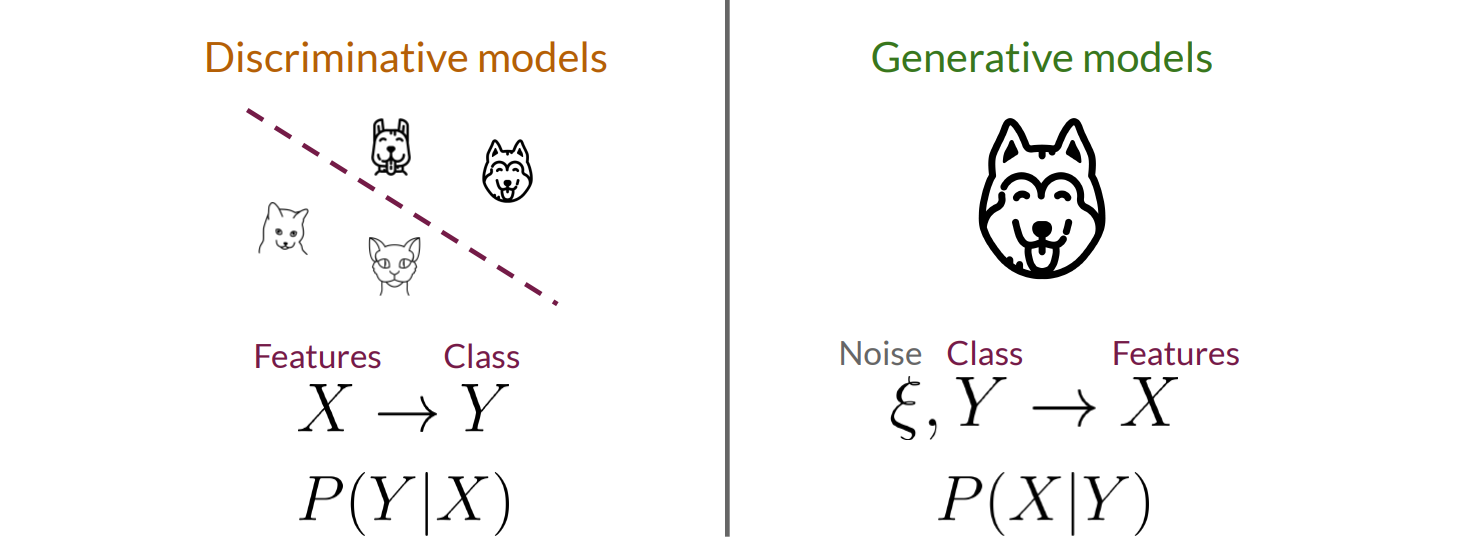

### 1.1.2 Generative Models

| Generative Model          | Model Introduction                                        | Model Parts                                   | Characteristics                                          | Workflow                                   | Use Cases                                                    |
|---------------------------|-----------------------------------------------------------|-----------------------------------------------|----------------------------------------------------------|--------------------------------------------|--------------------------------------------------------------|
| Variational Autoencoder (VAE) | A type of autoencoder that learns to represent input data in a lower-dimensional latent space. It consists of an encoder and a decoder network. | 1. Encoder: Maps input data to a latent space. 2. Latent space: Represents the learned distribution of the input data. 3. Decoder: Reconstructs the input data from the latent space. | - Learns a probabilistic distribution of the input data in the latent space. - Can generate new samples by sampling from the learned distribution. | 1. Encode input data into the latent space. 2. Sample from the latent space. 3. Decode the sampled latent vectors to generate new data. | Image generation, data generation, anomaly detection.           |
| Generative Adversarial Network (GAN) | Comprises two neural networks, a generator and a discriminator, engaged in a minimax game. The generator creates samples to fool the discriminator, which aims to distinguish real from fake samples. | 1. Generator: Creates fake samples from random noise. 2. Discriminator: Distinguishes between real and fake samples. | - Can generate high-quality, diverse samples. - Training can be unstable but often produces impressive results. | 1. The generator creates fake samples. 2. The discriminator evaluates the authenticity of both real and fake samples. 3. Both networks are trained simultaneously in a min-max game. | Image generation, image enhancement, data augmentation.        |
| Generative Adversarial Networks with Variational Inference (VAE-GAN) | Combines the strengths of VAEs and GANs by incorporating a VAE's encoder-decoder structure with a GAN's adversarial training. | 1. Encoder: Maps input data to a latent space. 2. Latent space: Represents the learned distribution of the input data. 3. Generator: Creates fake samples from latent vectors. 4. Discriminator: Distinguishes between real and fake samples. | - Addresses the mode collapse issue of GANs while retaining VAE's ability to learn probabilistic distributions. - Produces high-quality and diverse samples. | 1. The encoder maps input data to the latent space. 2. The generator creates fake samples from the latent space. 3. The discriminator evaluates the authenticity of both real and fake samples. 4. Both networks are trained simultaneously in a min-max game. | Image generation, image synthesis, style transfer.            |
| Autoregressive Models     | Models the conditional probability of each data point given previous data points. Each data point is generated sequentially. | - PixelCNN: Models the conditional probability of each pixel given previous pixels using masked convolutions. - PixelRNN: Similar to PixelCNN but uses recurrent neural networks for modeling dependencies. | - Can generate high-resolution samples with coherent structures. - Sampling is sequential, making it slower for large datasets. | 1. Train the model to predict the next data point given previous data points. 2. Sample sequentially to generate new data. | Image generation, text generation, speech synthesis.          |
| Flow-Based Models         | Learns a invertible mapping from a simple distribution (e.g., Gaussian) to the data distribution. Samples are generated by transforming samples from the simple distribution. | - Affine transformations: Scale and translation applied element-wise. - Permutation transformations: Rearranges dimensions. - Coupling transformations: Splits and recombines dimensions. | - Efficient sampling and likelihood estimation. - Invertible mapping allows exact likelihood computation. | 1. Train the model to transform samples from a simple distribution to match the data distribution. 2. Sample from the simple distribution and apply the learned transformations to generate new samples. | Image generation, data generation, density estimation.        |



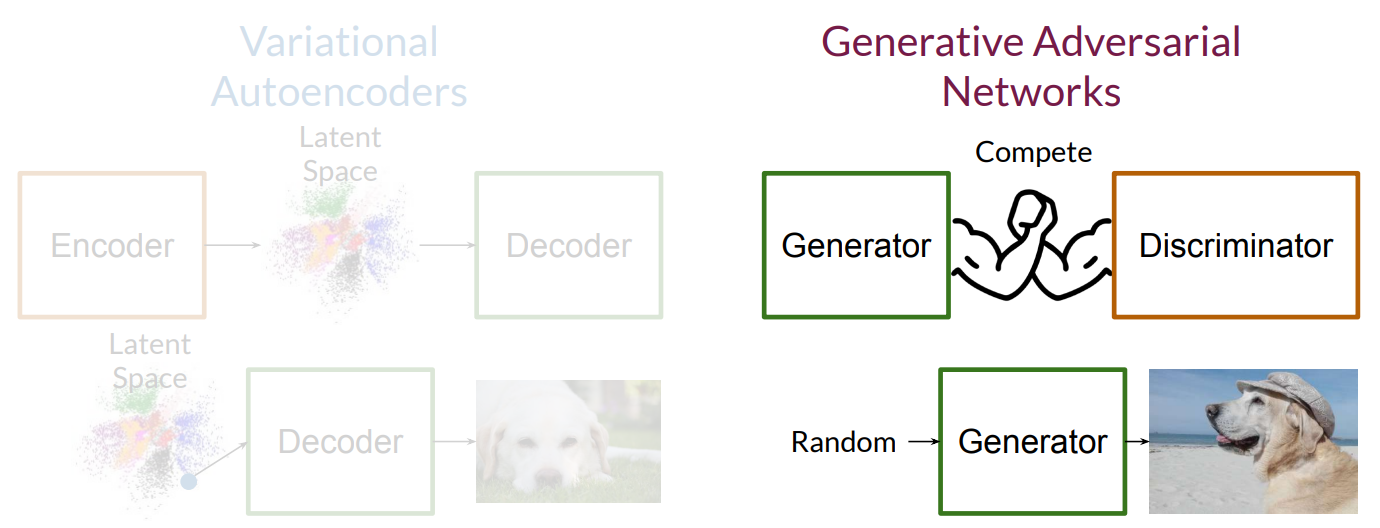

### 1.1.3 The Generator and the Discriminator

In a Generative Adversarial Network (GAN), the generator creates realistic data samples from random noise, aiming to mimic the real data distribution, while the discriminator evaluates these samples, distinguishing between real and generated data, providing feedback to the generator to improve its output.

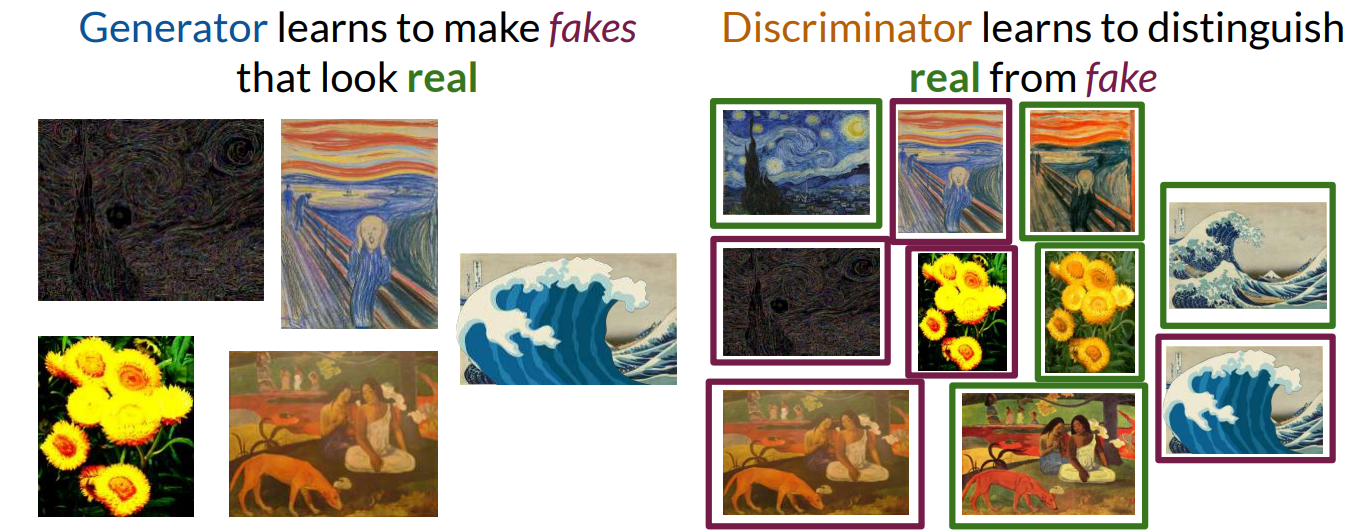

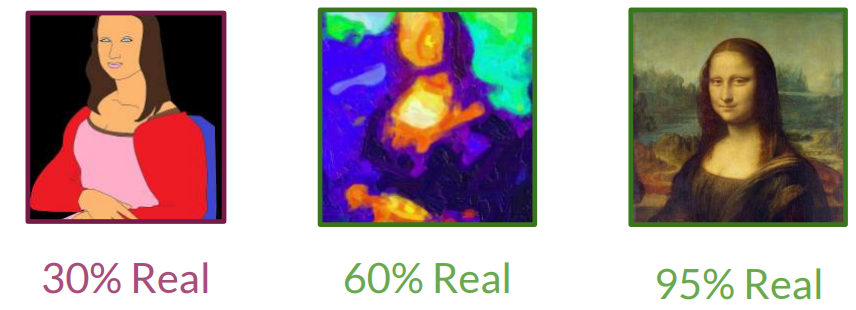

#### The Discriminator

**Classifiers (training)**


Classifiers - distinguish between different classes

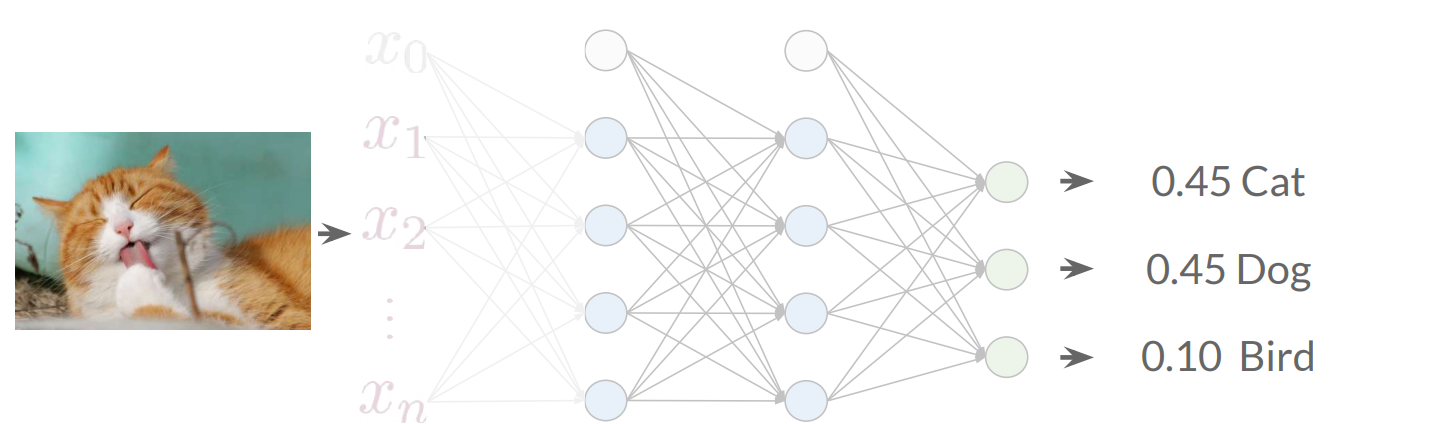

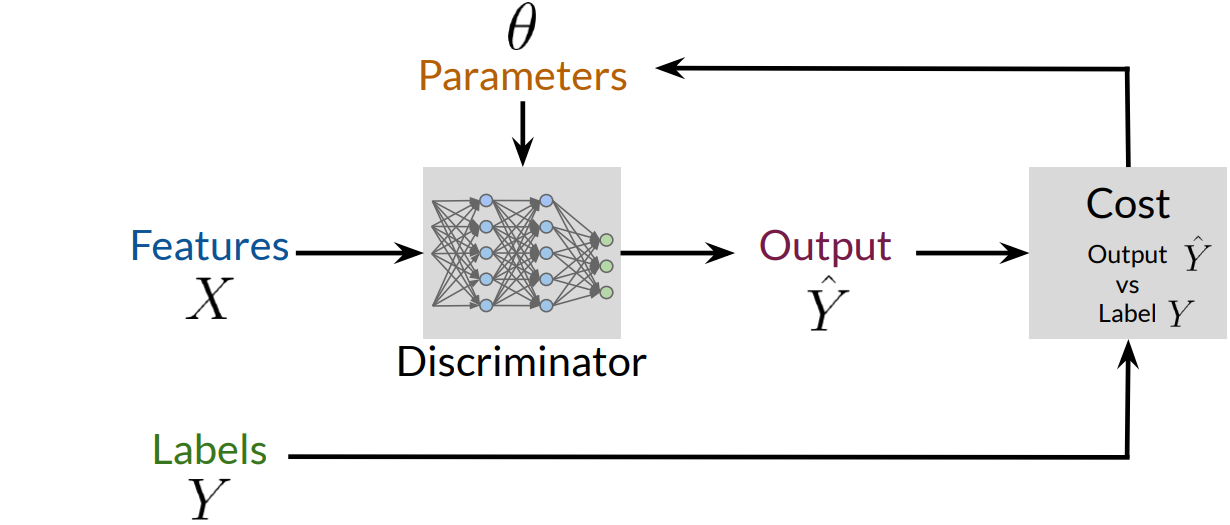

Suppose we have a set of features representing an image, denoted as $\mathbf{x} $, and we want to classify whether the image contains a cat or a dog. We'll use conditional probability to estimate the probability of each class given the features.

Let's denote:
- $ P(\text{cat} | \mathbf{x}) $ as the probability that the image contains a cat given the features $ \mathbf{x} $.
- $ P(\text{dog} | \mathbf{x}) $ as the probability that the image contains a dog given the features $ \mathbf{x} $.

We can use a classifier such as logistic regression or a neural network with softmax activation to estimate these probabilities.

For example, in logistic regression, we can compute the logits (unnormalized scores) for each class using a linear transformation followed by a bias term:

$$ z_{\text{cat}} = \mathbf{w}_{\text{cat}}^T \mathbf{x} + b_{\text{cat}} $$
$$ z_{\text{dog}} = \mathbf{w}_{\text{dog}}^T \mathbf{x} + b_{\text{dog}} $$

Here, $ \mathbf{w}_{\text{cat}} $ and $ \mathbf{w}_{\text{dog}} $ are weight vectors and $ b_{\text{cat}} $ and $ b_{\text{dog}} $ are bias terms specific to the cat and dog classes, respectively.

We then apply the softmax function to convert these logits into probabilities:

$$ P(\text{cat} | \mathbf{x}) = \frac{e^{z_{\text{cat}}}}{e^{z_{\text{cat}}} + e^{z_{\text{dog}}}} $$
$$ P(\text{dog} | \mathbf{x}) = \frac{e^{z_{\text{dog}}}}{e^{z_{\text{cat}}} + e^{z_{\text{dog}}}} $$



**Discriminator**


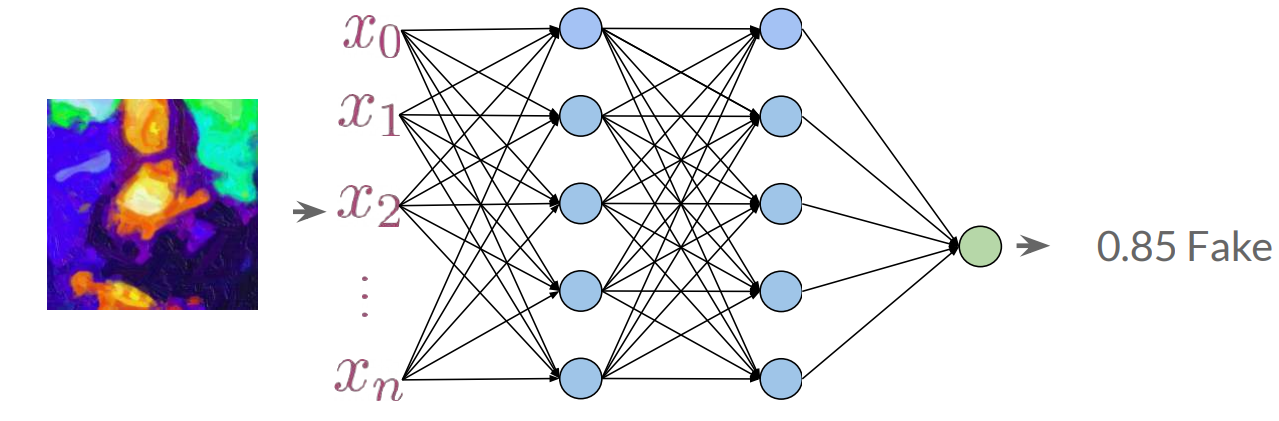

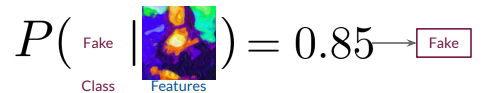

#### Generators

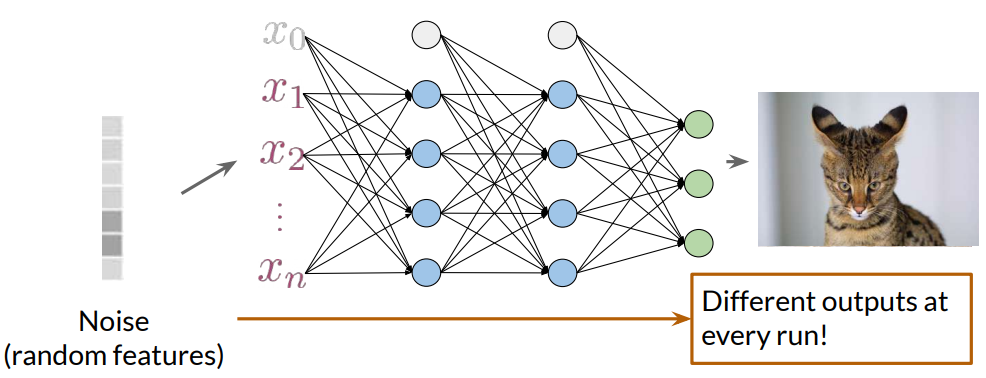

Learning of the Generator

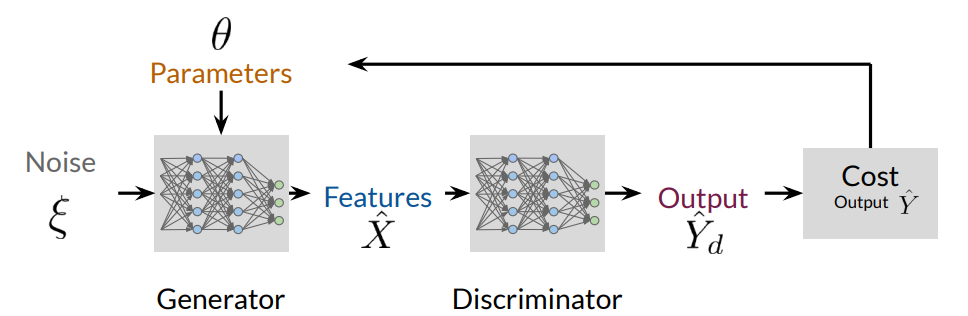

After the weights are determined, the model can be used to sample.

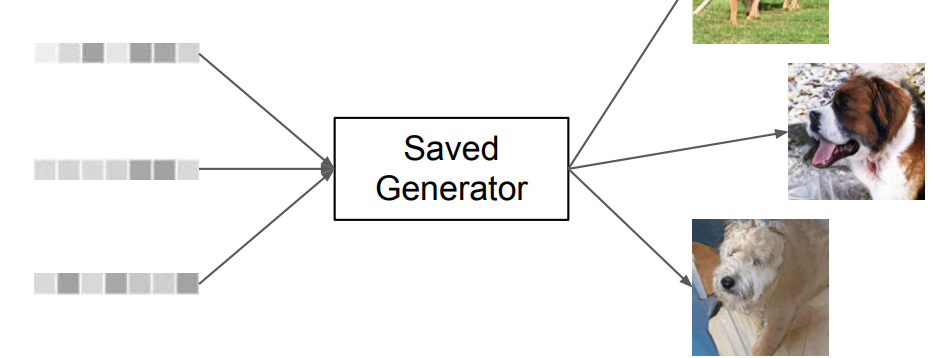

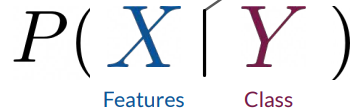